## Snapped boxes for inequalities evaluation

The dataset for this worksheet is dataExtreme.json.

### Summary

This data explores some extreme parameter settings, with relatively small datasets that don't contain enough samples.

Nevertheless, we learn that very small bases (below 1.5), and small group size (1,1) don't provide enough protection.

We also learn that inequalities with 'equal' (<= or >=) have a positive average error, whereas those without (< or >) have a negative average error. Need to see if we can fix this.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
stdout = sys.stdout

with open('simpleAttack.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame.from_dict(data['selected'])

In [2]:

display(df.head())

,groupMin,groupMax,cluster,op,base,numPoints,trueErrAvg,trueErrStd,P,PI,baseline,noisyErrAvg,noisyErrStd,noisyDiffsAvg,noisyDiffsStd
0,3,4,10,lte,5.0,5000,0.074447,0.482399,7.94,-1.17,9.00,-0.059691,1.606549,10.062374,10.370658
1,3,4,10,lte,2.0,5000,0.070210,0.459444,5.02,-4.01,8.68,0.059711,1.585300,9.836614,10.353271
2,3,4,10,lte,1.9,5000,0.067221,0.453435,5.56,-3.09,8.38,0.070686,1.592456,10.399168,9.748008
3,3,4,10,lte,1.5,5000,0.059846,0.439102,9.09,-2.55,11.36,-0.034106,1.626248,9.650579,9.284849
4,2,6,10,lte,5.0,5000,0.100372,0.678123,7.96,-2.14,9.89,-0.011152,1.696391,9.295539,9.535586


In [3]:
df.describe(include='all')

,groupMin,groupMax,cluster,op,base,numPoints,trueErrAvg,trueErrStd,P,PI,baseline,noisyErrAvg,noisyErrStd,noisyDiffsAvg,noisyDiffsStd
count,250.000000,250.000000,250.000000,250,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,lte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.272000,4.784000,2.888000,NaN,2.289520,4964.800000,0.003763,0.832634,37.80720,7.854240,33.648600,-0.000509,1.818199,1.620219,54.668183
std,1.085694,2.561952,2.117876,NaN,1.401519,392.756912,0.167666,0.604949,19.84352,15.165457,14.437538,0.173248,0.279308,2.361956,58.845214
min,1.000000,1.000000,1.000000,NaN,1.010000,600.000000,-0.390584,0.000000,5.02000,-14.980000,8.380000,-0.374379,1.484842,-0.004094,1.916265
25%,2.000000,4.000000,1.000000,NaN,1.500000,5000.000000,-0.157110,0.462435,16.85000,-4.215000,17.727500,-0.146918,1.585469,0.000200,2.756465
50%,2.000000,6.000000,2.000000,NaN,1.900000,5000.000000,0.000000,0.811075,35.31000,2.480000,34.420000,0.003474,1.737890,1.000000,9.747658
75%,3.000000,6.000000,5.000000,NaN,2.000000,5000.000000,0.159534,1.333606,54.32250,17.860000,51.187500,0.146491,2.027584,2.015423,99.694472


In [4]:

#dfSeed = df.query('numPoints > 5000')
#dfSeed2 = df.query('numPoints < 500')
df = df.query('numPoints > 600 and numPoints <= 5000')
dfGood = df.query('base > 1.1 and groupMax > 1')

Text(0.5, 0.98, 'Overview of all data')

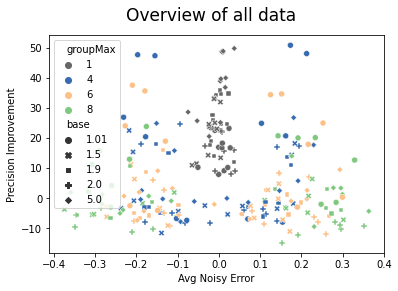

In [5]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="noisyErrAvg", y="PI",style='base',hue='groupMax',palette='Accent_r')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')
fig.suptitle('Overview of all data', fontsize = 17)

Ok, this certainly shows that with very small base, or very small groups, we get bad PI for the simple attack.

We also see that the larger group does indeed have more error (but not necessarily not much less PI).

Anyway, let's remove the extreme base and group sizes.

Text(0.5, 0.98, 'Overview of all data')

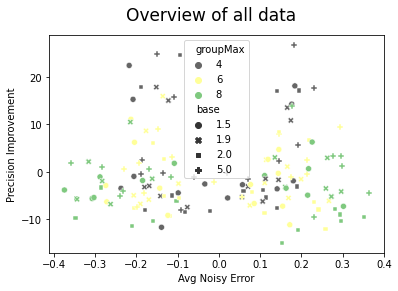

In [6]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=dfGood, x="noisyErrAvg", y="PI",style='base',hue='groupMax',palette='Accent_r')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')
fig.suptitle('Overview of all data', fontsize = 17)

Here we can see that the group size [2,4] is responsible for most of the higher PI values. But still everything is below PI=30, which is very good.

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Precision')]

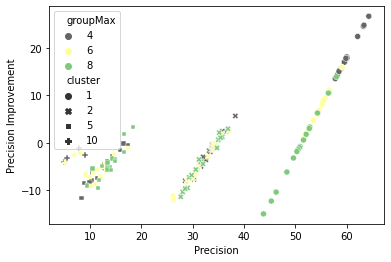

In [7]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=dfGood, x="P", y="PI",style='cluster',hue='groupMax',palette='Accent_r')
ax.set(ylabel = 'Precision Improvement', xlabel='Precision')
#fig.suptitle('Overview of all data', fontsize = 17)

The "cluster" simply determines how many singletons there are (basically higher cluster means fewer singletons). A singleton is a distinct value. The correlation comes from the fact that the baseline from which PI is computed is the fraction of correct positive predictions to all positive predictions when every prediction is positive (i.e. predicts that the victim is present). Data with more singletons simply means higher precision. 

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Avg Noisy Error')]

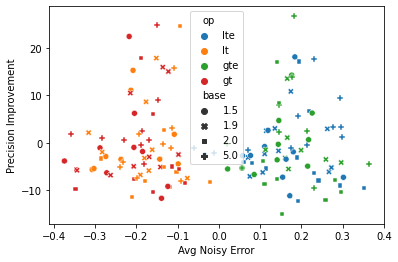

In [8]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=dfGood, x="noisyErrAvg", y="PI",style='base',hue='op')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')

In the above, we seen that operators with 'equal' skew positive, while operaters without skew negative. The reason is this: The boxed approach really doesn't discriminate between with and without equal. As a rule, it just sticks the midpoint somewhere, and rarely does an actual value lie there. On the other hand, the true count does include or not include some value. So that tends to skew the boxed version relative to the true underlying data. (This is my guess anyway. If that is right, nothing we can do about it.)

[Text(0.5, 0, 'Group Max'), Text(0, 0.5, 'Average Error')]

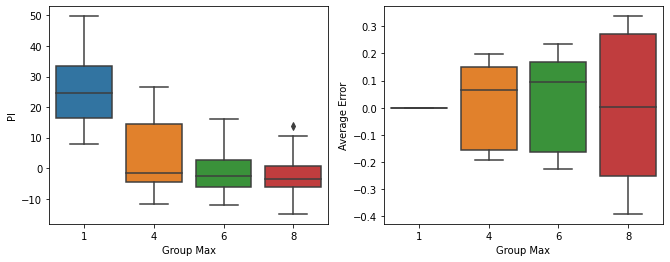

In [9]:
dfMax = df.query('base > 1.1')
fig, axes = plt.subplots(1,2,figsize=(11,4))
ax1 = sns.boxplot(x='groupMax',y='PI',data=dfMax,ax=axes[0])
ax2 = sns.boxplot(x='groupMax',y='trueErrAvg',data=dfMax,ax=axes[1])
ax1.set(xlabel = 'Group Max', ylabel='PI')
ax2.set(xlabel = 'Group Max', ylabel='Average Error')

The above shows the effect of Group Size parameters (these correspond to [min,max] of [1,1], [2,4], [2,6], and ,[4,8]). None of these quite correspond to real LCF computation, since here I'm using uniform distribution for a kind of poor man's LCF.

In any event, we see here that PI (for this particular simple attack) hits diminishing returns around [2,6]. Average error continues to group with larger Group Max, but is never that bad. 

We'll have to see if there are other attacks that lead to a worse PI.

[Text(0.5, 0, 'Group Max'), Text(0, 0.5, 'Average Error')]

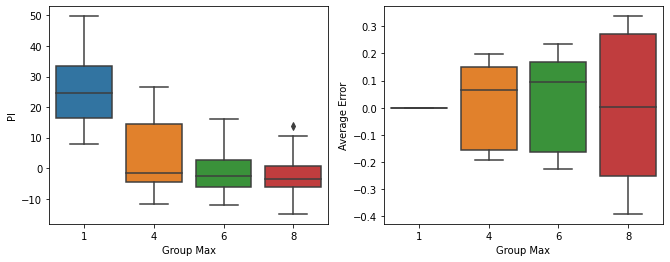

In [10]:
dfMax = df.query('base > 1.1')
fig, axes = plt.subplots(1,2,figsize=(11,4))
ax1 = sns.boxplot(x='groupMax',y='PI',data=dfMax,ax=axes[0])
ax2 = sns.boxplot(x='groupMax',y='trueErrAvg',data=dfMax,ax=axes[1])
ax1.set(xlabel = 'Group Max', ylabel='PI')
ax2.set(xlabel = 'Group Max', ylabel='Average Error')

Here we see that Group Max hits diminishing returns relative to PI (for this particular simple attack) at 6 (group size [2,6]). Error continues to grow however for increasing Group Max, as one would expect. 

There may be other attacks that lead to a larger PI for which we'll need the larger group size (or larger min/max range) to defend against.

[Text(0.5, 0, 'Base'), Text(0, 0.5, 'Average Error')]

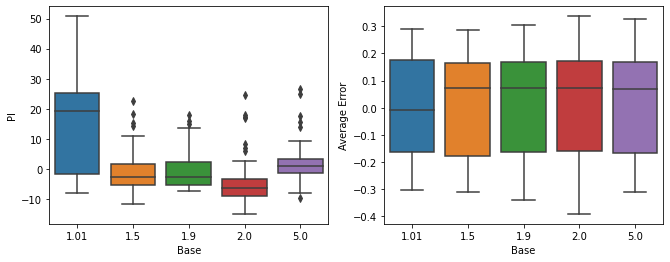

In [11]:
dfMax = df.query('groupMax > 1')
fig, axes = plt.subplots(1,2,figsize=(11,4))
ax1 = sns.boxplot(x='base',y='PI',data=dfMax,ax=axes[0])
ax2 = sns.boxplot(x='base',y='trueErrAvg',data=dfMax,ax=axes[1])
ax1.set(xlabel = 'Base', ylabel='PI')
ax2.set(xlabel = 'Base', ylabel='Average Error')